In [ ]:
!git clone https://github.com/KU-DIC/LG_time_series_day15.git #코랩 사용

# [시계열 이상치 탐지 3 실습]
# RTC Control Chart

##### jupyter notebook 단축키

- ctrl+enter: 셀 실행   
- shift+enter: 셀 실행 및 다음 셀 이동   
- alt+enter: 셀 실행, 다음 셀 이동, 새로운 셀 생성
- a: 상단에 새로운 셀 만들기
- b: 하단에 새로운 셀 만들기
- dd: 셀 삭제(x: 셀 삭제)
- 함수 ( ) 안에서 shift+tab: arguments description. shift+tab+tab은 길게 볼 수 있도록

# <br>__1. Data: Simulation Dataset__


In [1]:
''' 기본 모듈 및 분류 모듈'''
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as rd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

### Step1. 데이터 불러오기

In [5]:
dataset = pd.read_csv('/content/LG_time_series_day15/data/train.csv')
X_test = pd.read_csv('/content/LG_time_series_day15/data/test.csv')

In [7]:
X_train = dataset.iloc[:, 0:10].values

In [8]:
wsz=10
ntree=500

In [9]:
RF=RandomForestClassifier(n_estimators = ntree, criterion = 'entropy', random_state=0 ,oob_score=True)

In [10]:
temp_y=np.array(["N","A"])
label_y=np.repeat(temp_y,[wsz,wsz],axis=0)
label_y

array(['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A'], dtype='<U1')

### Step2. Training Step (Control Limit 설정)
>Real-time Control Chart with RandomForest Classifier

In [11]:
prob_CL=[]
vi_tr=[]
for i in range(100):
    idx_ref = rd.sample(range(X_train.shape[0]),wsz)
    idx_con = rd.sample(range(X_train.shape[0]),wsz)
    tempRef = dataset.iloc[idx_ref,0:10]
    tempCon = dataset.iloc[idx_con,0:10]
    tempData = pd.concat([tempRef,tempCon])
    RF.fit(tempData,label_y)
    prob_CL.append(RF.oob_score_)
    vi_tr.append(RF.feature_importances_)

In [12]:
CL=np.quantile(prob_CL,0.95)
CL

0.6

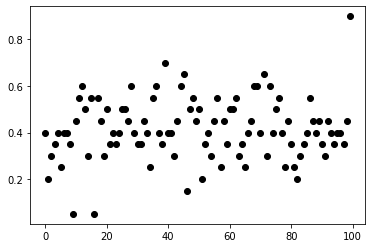

In [13]:
plt.plot(prob_CL,'ko')

### Step3. Test Step 

In [14]:
prob=[]
vi=[]
for i in range(100-wsz):
    idx_ref = rd.sample(range(X_train.shape[0]),wsz)
    #idx_con = rd.sample(range(X_train.shape[0]),wsz)
    tempRef = dataset.iloc[idx_ref,0:10]
    tempCon = X_test.iloc[(i):(i+wsz),0:10]
    tempData = pd.concat([tempRef,tempCon])
    RF.fit(tempData,label_y)
    prob.append(RF.oob_score_)
    vi.append(RF.feature_importances_)

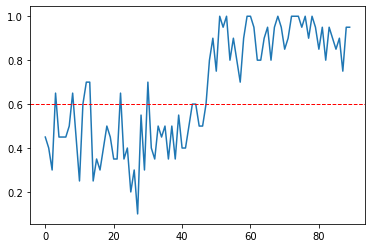

In [15]:
plt.plot(prob)
plt.axhline(CL,color ='r',linewidth=1,linestyle='--')

In [16]:
# 변수별 feature importance 확인
vi_arr = np.array(vi)
vi_arr

array([[0.10900737, 0.10785499, 0.08412986, 0.07537683, 0.07386533,
        0.10872483, 0.11352585, 0.06934386, 0.10546357, 0.15270751],
       [0.0673816 , 0.07912283, 0.04986252, 0.14492675, 0.12939206,
        0.10572464, 0.15393888, 0.08399925, 0.07196956, 0.11368192],
       [0.11587079, 0.10211757, 0.09538339, 0.10233887, 0.07505803,
        0.06859843, 0.17956417, 0.08544108, 0.10204346, 0.07358421],
       [0.08375028, 0.09462774, 0.09396711, 0.06360807, 0.10125111,
        0.07453143, 0.24740299, 0.10481209, 0.07108718, 0.06496199],
       [0.05394389, 0.06059359, 0.07731374, 0.05884359, 0.16804651,
        0.1464185 , 0.10770659, 0.14916199, 0.06506135, 0.11291025],
       [0.0633629 , 0.08460008, 0.06171009, 0.07068225, 0.05907414,
        0.12441846, 0.11123778, 0.12987724, 0.07942259, 0.21561446],
       [0.07331567, 0.08494174, 0.05745001, 0.14137891, 0.1068544 ,
        0.06824054, 0.15951311, 0.11558959, 0.07665261, 0.11606342],
       [0.05825809, 0.05024069, 0.0557462

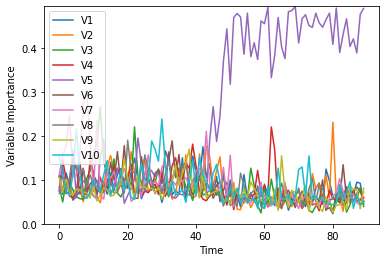

In [17]:
# feature importance plot
plt.ylim(0,vi_arr.max())
plt.xlabel('Time')
plt.ylabel('Variable Importance')
for i in range(X_test.shape[1]):
    plt.plot(vi_arr[:,i])
plt.legend(labels=X_test.columns,loc='upper left')

---